In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
best_lgbm = pd.read_csv('submission_lightgbm.csv')
best_xgb = pd.read_csv('submission_xgboost.csv')
best = pd.read_csv('best.csv')

preds = [best_lgbm, best_xgb, best]
weights = [2, 2, 6]

mean = 0
square = 0
harmonic = 0
geometric = 1
for i in range(len(preds)):
    mean += weights[i] * preds[i]['Predicted']
    square += weights[i] * preds[i]['Predicted'] ** 2
    harmonic += weights[i] / preds[i]['Predicted']
    geometric *= preds[i]['Predicted'] ** weights[i]

mean /= sum(weights)
square /= sum(weights)
square = np.sqrt(square)
harmonic = sum(weights) / harmonic
geometric = geometric ** (1 / sum(weights))






In [10]:
path_prefix = '../cs5228-2310-final-project/'
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

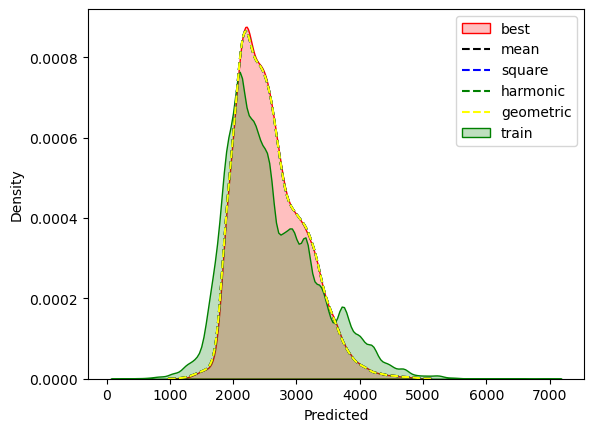

In [11]:
sns.kdeplot(best['Predicted'], label='best', color='red', fill=True)
sns.kdeplot(mean, label='mean', color='black', linestyle='--')
sns.kdeplot(square, label='square', color='blue', linestyle='--')
sns.kdeplot(harmonic, label='harmonic', color='green', linestyle='--')
sns.kdeplot(geometric, label='geometric', color='yellow', linestyle='--')
sns.kdeplot(df_train['monthly_rent'], label='train', color='green', fill=True)
#mean_k = best1['Predicted'] * k + best2['Predicted'] * (1 - k)
#sns.kdeplot(mean_k, label='mean', color='black', linestyle='--')
plt.legend()

In [ ]:
submission = pd.read_csv(path_prefix + 'example-submission.csv')
submission['Predicted'] = mean
submission.to_csv('submission_mean.csv', index=False)
submission['Predicted'] = square
submission.to_csv('submission_square.csv', index=False)
submission['Predicted'] = harmonic
submission.to_csv('submission_harmonic.csv', index=False)
submission['Predicted'] = geometric
submission.to_csv('submission_geometric.csv', index=False)